## Time Series Analysis on Walmart Sales data

### Importing all the relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import itertools
import pandas as pd
import statsmodels.api as sm
import matplotlib
warnings.filterwarnings("ignore")
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['text.color'] = 'k'

### Read the training data into a pandas dataframe

In [2]:
Data='train.csv'

sales= pd.read_csv(Data)

In [3]:
# print first few rows of data
sales.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,26,92,2011-08-26,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513
1,34,22,2011-03-25,5945.97,False,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,A,158114
2,21,28,2010-12-03,1219.89,False,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,B,140167
3,8,9,2010-09-17,11972.71,False,75.32,2.582,NaN,NaN,NaN,NaN,NaN,214.878556,6.315,A,155078
4,19,55,2012-05-18,8271.82,False,58.81,4.029,12613.98,NaN,11.5,1705.28,3600.79,138.106581,8.150,A,203819


### Creating sales_date column

In [4]:
sales['sales_date']=sales.Date

sales.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,sales_date
0,26,92,2011-08-26,87235.57,False,61.10,3.796,NaN,NaN,NaN,NaN,NaN,136.213613,7.767,A,152513,2011-08-26
1,34,22,2011-03-25,5945.97,False,53.11,3.480,NaN,NaN,NaN,NaN,NaN,128.616064,10.398,A,158114,2011-03-25
2,21,28,2010-12-03,1219.89,False,50.43,2.708,NaN,NaN,NaN,NaN,NaN,211.265543,8.163,B,140167,2010-12-03
3,8,9,2010-09-17,11972.71,False,75.32,2.582,NaN,NaN,NaN,NaN,NaN,214.878556,6.315,A,155078,2010-09-17
4,19,55,2012-05-18,8271.82,False,58.81,4.029,12613.98,NaN,11.5,1705.28,3600.79,138.106581,8.150,A,203819,2012-05-18


In [5]:
#lets check sale start and end date
sales['sales_date'].min(), sales['sales_date'].max()

('2010-02-05', '2012-10-26')

### taking relevant columns into account

In [6]:
columnss = ['Store','Date','Dept','IsHoliday','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment','Type','Size']

#drop above columns from dataframe
sales.drop(columnss, axis=1, inplace=True)

#sort sales dataframe by sales_date column
sales = sales.sort_values('sales_date')

In [7]:
# print few rows of sales dataframe
sales.head()

,Weekly_Sales,sales_date
80235,10130.02,2010-02-05
8583,3798.40,2010-02-05
110078,4.96,2010-02-05
199024,47546.05,2010-02-05
199085,33057.95,2010-02-05


### Creating datetime column by converting sales_date column to a pandas datetime format

In [8]:
sales['datetime'] = pd.to_datetime(sales['sales_date'], format = '%Y-%m-%d', errors='coerce')

sales.head(5)

,Weekly_Sales,sales_date,datetime
80235,10130.02,2010-02-05,2010-02-05
8583,3798.40,2010-02-05,2010-02-05
110078,4.96,2010-02-05,2010-02-05
199024,47546.05,2010-02-05,2010-02-05
199085,33057.95,2010-02-05,2010-02-05


### Dropping sales_date column

In [9]:
sales.drop(columns='sales_date', axis=1, inplace=True)

In [10]:
# lets check columns data types
sales.dtypes

Weekly_Sales           float64
datetime        datetime64[ns]
dtype: object

In [11]:
# lets check count of null values in each column
sales.isnull().sum()

Weekly_Sales    0
datetime        0
dtype: int64

In [12]:
sales = sales.groupby('datetime')['Weekly_Sales'].sum().reset_index()

### Setting datetime as indexed column

In [13]:
sales = sales.set_index('datetime')
sales.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='datetime', length=143, freq=None)

### finding mean of weekly sales by resampling by month start frequency

In [14]:
monthly_sales = sales['Weekly_Sales'].resample('MS').mean()

In [15]:
monthly_sales['2012':]

datetime
2012-01-01    2.778775e+07
2012-02-01    3.211715e+07
2012-03-01    3.101348e+07
2012-04-01    3.193377e+07
2012-05-01    3.187959e+07
2012-06-01    3.238922e+07
2012-07-01    3.107405e+07
2012-08-01    3.210573e+07
2012-09-01    3.067925e+07
2012-10-01    3.031781e+07
Freq: MS, Name: Weekly_Sales, dtype: float64

In [16]:
monthly_sales.head()

datetime
2010-02-01    3.201113e+07
2010-03-01    3.019273e+07
2010-04-01    3.075302e+07
2010-05-01    3.087618e+07
2010-06-01    3.292102e+07
Freq: MS, Name: Weekly_Sales, dtype: float64

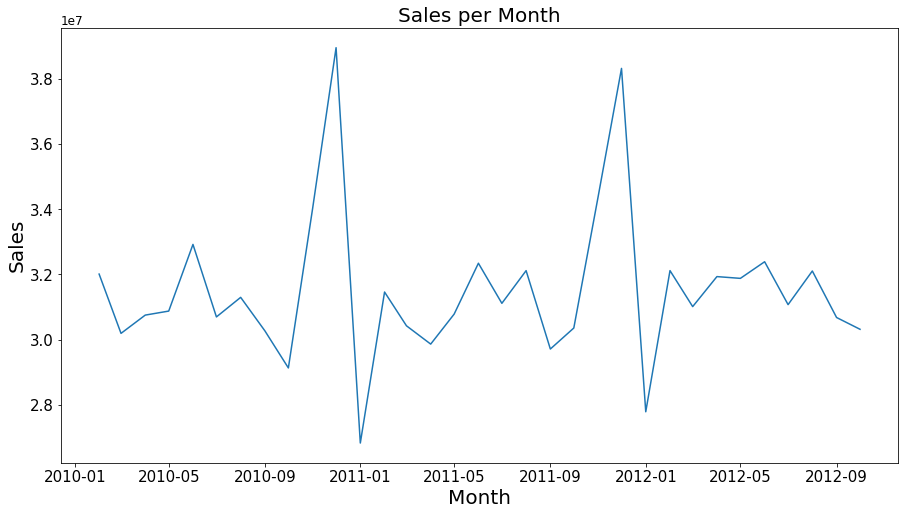

In [17]:
plt.figure(figsize=(15,8))
plt.ylabel('Sales',fontsize=20)
plt.xlabel('Month',fontsize=20)
plt.title('Sales per Month',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#monthly_sales.plot()
plt.plot(monthly_sales)
plt.show()

### Decompostion plot of time series data

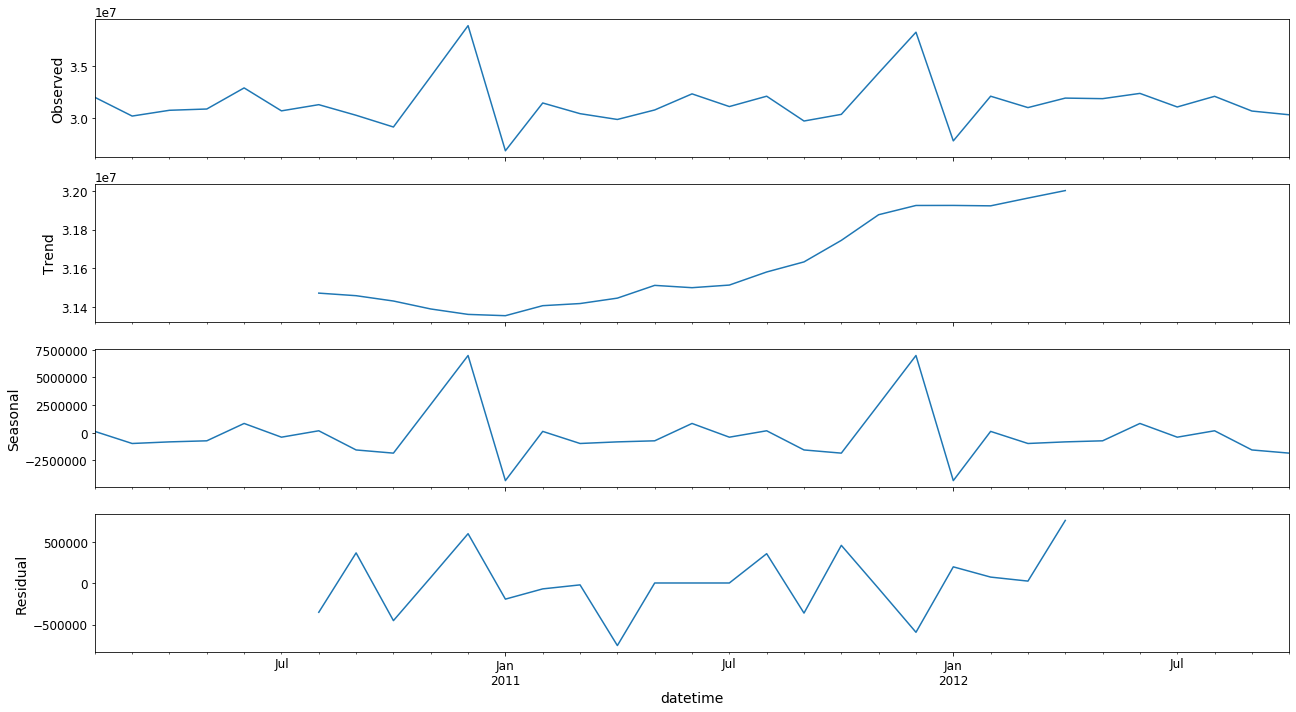

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 10
decomposition_plot = sm.tsa.seasonal_decompose(monthly_sales, model='additive')
decomposition_plot.plot()
plt.show()

### Since there is visble trend in our data and seasonality is also present so we have to remove those components from our model so we are going to use the arima model

### Arima model

In [19]:
a = b = c = range(0, 2)
abc = list(itertools.product(a, b, c))
seasonal_abc = [(x[0], x[1], x[2], 12) for x in list(itertools.product(a, b, c))]
print('combinations for Seasonal ARIMA Model')
print('SARIMAX: {} x {}'.format(abc[1], seasonal_abc[1]))
print('SARIMAX: {} x {}'.format(abc[1], seasonal_abc[2]))
print('SARIMAX: {} x {}'.format(abc[2], seasonal_abc[3]))
print('SARIMAX: {} x {}'.format(abc[2], seasonal_abc[4]))

combinations for Seasonal ARIMA Model
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


### finding the optimal set of parameters for our model

In [20]:
for parameters in abc:
    for param_seasonal in seasonal_abc:
        try:
            model = sm.tsa.statespace.SARIMAX(monthly_sales,order=parameters,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)
            results = model.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(parameters, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1197.990946665313
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:604.645071835674
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:630.9441567414517
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:273.46373712835
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1141.698420965081
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:574.2478108268009
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:769.9669822252378
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:275.1674738288212
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1026.6993604477648
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:583.9337445613758
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:604.0178906006511
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:240.4663020324947
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:973.7203933609308
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:546.814383479271
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:639.5485570475337
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:243.81876991134845
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1060.7830343127926
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:602.9094433955119
ARIMA(1, 0,

### since the combination of ARIMA(1, 1, 0)x(1, 1, 0, 12)12 gives the lowest value of AIC = 214.33675750834465 so it is our optimal solution

In [21]:
model1 = sm.tsa.statespace.SARIMAX(monthly_sales,order=(1, 1, 0),seasonal_order=(1, 1, 0, 12),enforce_stationarity=False,enforce_invertibility=False)
results = model1.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0256      0.664      0.039      0.969      -1.276       1.328
ar.S.L12      -0.6134      0.557     -1.101      0.271      -1.705       0.478
sigma2      7.482e+11   4.18e-13   1.79e+24      0.000    7.48e+11    7.48e+11


In [22]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                       Weekly_Sales   No. Observations:                   33
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -104.168
Date:                            Mon, 09 Dec 2019   AIC                            214.337
Time:                                    21:34:42   BIC                            214.174
Sample:                                02-01-2010   HQIC                           212.331
                                     - 10-01-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0256      0.664      0.039      0.969      -1.276       1.328
ar.S.L12      -0.6134      0.557     -1.101      0.271      -1.705       0.478
sigma2      7.482e+11   4.18e-13   1.79e+24      0.000    7.48e+11    7.48e+11
===================================================================================
Ljung-Box (Q):                         nan   Jarque-Bera (JB):                 0.94
Prob(Q):                               nan   Prob(JB):                         0.62
Heteroskedasticity (H):               0.03   Skew:                            -0.89
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.62e+39. Standard errors may be unstable.
"""

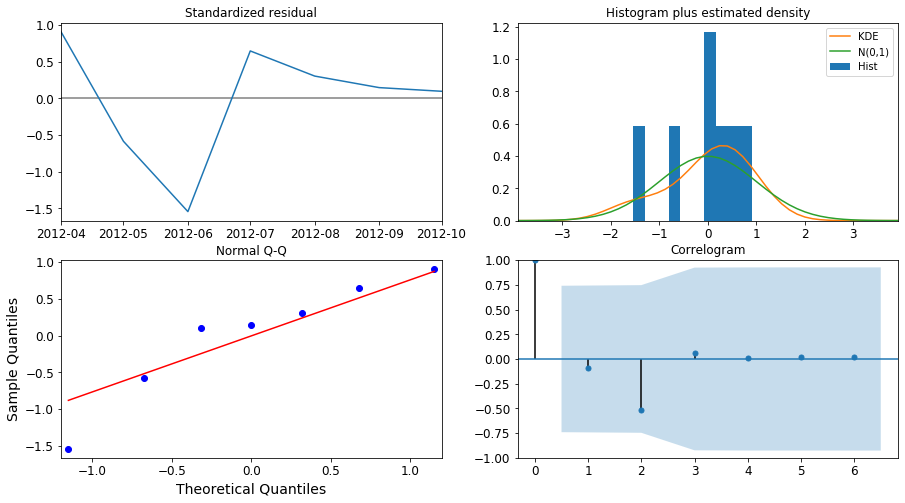

In [23]:
#plt.plot_diagnostics(results)
results.plot_diagnostics(lags=6,figsize=(15, 8))
plt.show()

### Forecasting the sales aginst the true parameters

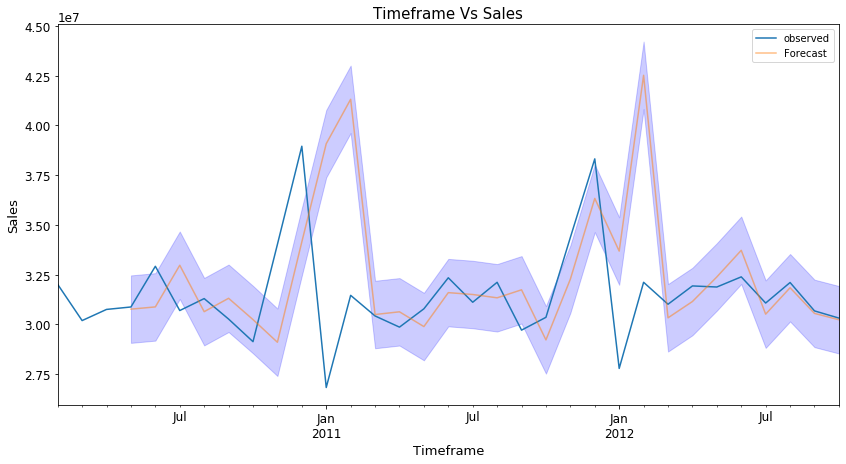

In [24]:
pred = results.get_prediction(start=pd.to_datetime('2010-05-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = monthly_sales['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.5, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='b', alpha=.2)
ax.set_xlabel('Timeframe', fontsize = 13)
ax.set_ylabel('Sales', fontsize = 13)
ax.set_title('Timeframe Vs Sales', fontsize = 15)
plt.legend()
plt.show()

### Mean forecast error of the forecast is 

In [25]:
monthly_sales_forecasted = pred.predicted_mean
monthly_sales_truth = monthly_sales['2010-05-01':]
mse = ((monthly_sales_forecasted - monthly_sales_truth)).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 842113.82


In [26]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 917.67


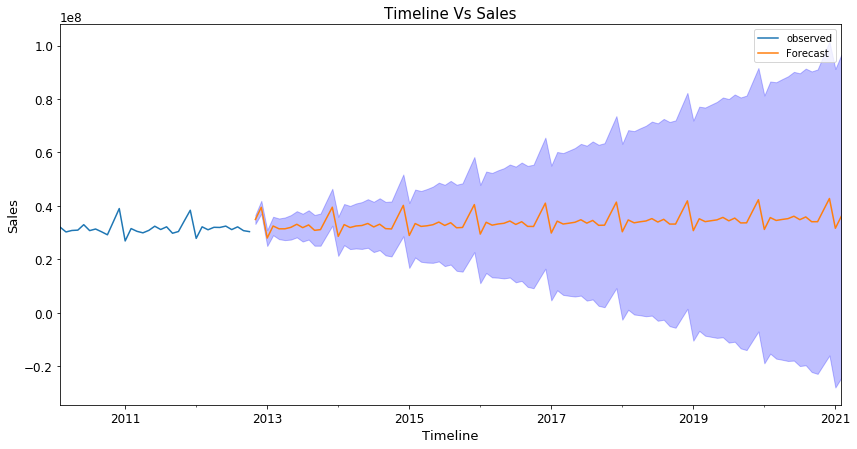

In [27]:
pred_uc = results.get_forecast(steps=100)

pred_ci = pred_uc.conf_int()
ax = monthly_sales.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='blue', alpha=.25)
ax.set_xlabel('Timeline', fontsize = 13)
ax.set_ylabel('Sales', fontsize = 13)
ax.set_title('Timeline Vs Sales', fontsize = 15)
plt.legend()
plt.show()

In [28]:
forecast = pred_uc.predicted_mean

forecast.head(14)

2012-11-01    3.487121e+07
2012-12-01    3.942358e+07
2013-01-01    2.791420e+07
2013-02-01    3.242896e+07
2013-03-01    3.136715e+07
2013-04-01    3.137827e+07
2013-05-01    3.192208e+07
2013-06-01    3.307573e+07
2013-07-01    3.181311e+07
2013-08-01    3.282683e+07
2013-09-01    3.080081e+07
2013-10-01    3.105630e+07
2013-11-01    3.527903e+07
2013-12-01    3.946073e+07
Freq: MS, dtype: float64